<a href="https://colab.research.google.com/github/rishabhdeepsingh/tensorflow/blob/main/04FeedforwardArtificialNeuralNetworks/ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q tensorflow

In [7]:
#Other imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
#Make the dataset
N = 1000
X = np.random.random((N,2)) * 6 - 3 #uniformly distributed between(-3,+3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This implements the function: y=cos(2x₁)+cos(3x₂)

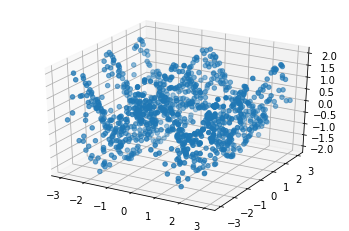

In [18]:
#Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],Y)
#plt.show()

In [19]:
#Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1),
])

In [20]:
#Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X,Y,epochs=500, verbose=0)

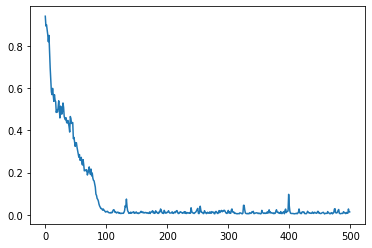

In [21]:
#Plot the loss
plt.plot(r.history['loss'],label='loss')

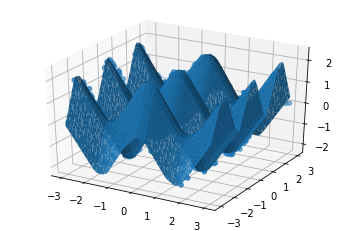

In [26]:
#Plot the prediction
fig =plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1], Y)

#surface plot
line = np.linspace(-3,3,50)
xx,yy = np.meshgrid(line,line)
x_grid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(x_grid).flatten()
ax.plot_trisurf(x_grid[:,0], x_grid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

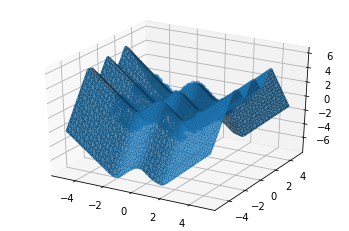

In [27]:
#Can it extrapolate?
#Plot the prediction
fig = plt.figure()              
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

#surface plot
line = np.linspace(-5,5,50)
xx, yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

Doesn't work 😞